<a href="https://colab.research.google.com/github/18K41A0562/NLP/blob/main/NLP_project_code(TEAM_19).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
Choose which category you want to find the sentiment:
0.Username
1.hashtag or keyword
1
Please enter keyword or hashtag to search: pixel6
Please enter how many tweets to analyze: 100
-> Pixel6買ったった https://t.co/pxZ9zSknxC
-> 13 grudnia powinna wskoczyć aktualizacja na #Pixel6 i #Pixel6Pro:
https://t.co/dHNRKXUvKI
-> 【更新通知】日本Googleが漏らす。Pixel 6｜6 Proの12月アップデートは13日配信か
https://t.co/PUrMFZK14Z

#TeamPixel #Pixel6
-> 【ブログ更新】日本Googleが漏らす。Pixel 6｜6 Proの12月アップデートは13日配信か
https://t.co/MSnjNNkYcq

#TeamPixel #Pixel6
-> pixel6のノーマル安くね
-> マッマのためにpixel6購入した
-> RT @FRDPRH: 🔥 #Pixel6 #Pixel6Pro 🔥

Bientôt de nouvelles fonctions sur ton Pixel... et on fait le point en vidéo.

👉🏼 https://t.co/eoMjmjHM…
-> そういえばpixel6自体はめちゃくちゃサクサクのぬるぬるで動いてくれてヤバいほど今までと比べたらとんでもないほど快適です☆⌒（＊＾∇゜）v
-> pixel6さんの初期設定のせいか、やたら手前にピントが合う🤔
-> ご飯終わったしPixel6の開封してデータ移行やるかいのぉ
-> 🔥 #Pixel6 #Pixel6Pro 🔥

Bientôt de 

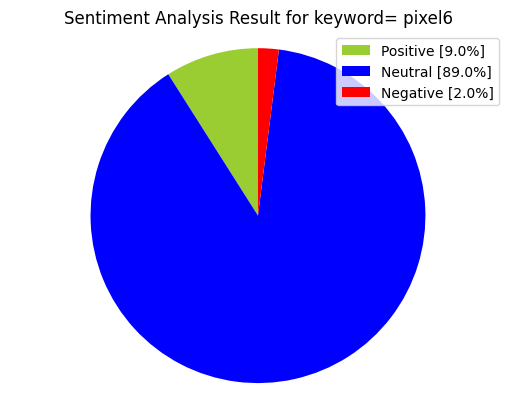

In [5]:
import tweepy
from tweepy import API
from tweepy import Cursor

from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
from textblob import TextBlob
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Import Libraries
import nltk
nltk.download('vader_lexicon')


from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
#import pycountry as pc
import re
import string
#from wordcloud import WordCloud, STOPWORDS
#from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from langdetect import detect
#from nltk.stem import SnowballStemmer
#from sklearn.feature_extraction.text import CountVectorizer











#twitter client
class TwitterClient():
    def __init__(self, twitter_user=None):
        self.auth = TwitterAuthenticator().authenticate_twitter_app()
        self.twitter_client = API(self.auth)

        self.twitter_user = twitter_user

    def get_twitter_client_api(self):
        return self.twitter_client

    def get_user_timeline_tweets(self, num_tweets):
        tweets = []
        for tweet in Cursor(self.twitter_client.user_timeline, id=self.twitter_user).items(num_tweets):
            tweets.append(tweet)
        return tweets

    def get_friend_list(self, num_friends):
        friend_list = []
        for friend in Cursor(self.twitter_client.friends, id=self.twitter_user).items(num_friends):
            friend_list.append(friend)
        return friend_list

    def get_home_timeline_tweets(self, num_tweets):
        home_timeline_tweets = []
        for tweet in Cursor(self.twitter_client.home_timeline, id=self.twitter_user).items(num_tweets):
            home_timeline_tweets.append(tweet)
        return home_timeline_tweets


#TWITTER AUTHENTICATOR

ACCESS_TOKEN = "1254687654781677568-dUbRJdVH9HU3Mz2FRoPkwQFBE2nIkz"
ACCESS_TOKEN_SECRET = "upin4voEz0tRfBEiEy4wTbhz9iR8dW4QqyY5raLYBsqGZ"
CONSUMER_KEY = "O1qDS7zrjIWKa80zYiXKCW79q"
CONSUMER_SECRET = "WEXqoBLuDFMwt2jejRp0O0U7Oo8VjD1B3PsdWZy8ECA3OfssdM"


class TwitterAuthenticator():

    def authenticate_twitter_app(self):
        auth = OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
        auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
        return auth



class TwitterStreamer():
    """
    class for streaming and processing live tweets.
    """
    def __init__(self):
        self.twitter_autenticator = TwitterAuthenticator()



    def stream_tweets(self, fetched_tweets_filename, hash_tag_list):
        #this handles twitter authentication and connection to the twitter streaming API.
        listener = TwitterListener(fetched_tweets_filename)
        auth=self.twitter_autenticator.authenticate_twitter_app()

        stream = Stream(auth, listener)
        stream.filter(track=hash_tag_list)


class TwitterListener(StreamListener):
    """
    This a basic listener class that just prints received tweets to stdout.
    """
    def __init__(self, fetched_tweets_filename):
        self.fetched_tweets_filename = fetched_tweets_filename

    def on_data(self, data):
        try:
            #print(data)
            with open(self.fetched_tweets_filename, 'a') as tf:
                tf.write(data)
            return True
        except BaseException as e:
            print("error on_data: %s" % str(e))
        return True

    def on_error(self, status):
        if status == 420:
            #returning false on_data method in case rate limit occurs.
            return False
        print(status)

    
class TweetAnalyzer():
    """
    Functionality for analyzing and categorizing content from tweets
    """

    def clean_tweet(self, tweet):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\s+)", " ", tweet).split())

    def analyze_sentiment(self, tweet):
        analysis = TextBlob(self.clean_tweet(tweet))
        
        if analysis.sentiment.polarity > 0:
            return 1
        elif analysis.sentiment.polarity == 0:
            return 0
        else:
            return -1


    def tweets_to_data_frame(self, tweets):
        df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['tweets'])
        
        df['id'] = np.array([tweet.id for tweet in tweets])
        df['len'] = np.array([len(tweet.text) for tweet in tweets])
        df['date'] = np.array([tweet.created_at for tweet in tweets])
        df['source'] = np.array([tweet.source for tweet in tweets])
        df['likes'] = np.array([tweet.favorite_count for tweet in tweets])
        df['retweets'] = np.array([tweet.retweet_count for tweet in tweets])
        
        return df

    

if __name__ == "__main__":
    
    twitter_client = TwitterClient()
    tweet_analyzer = TweetAnalyzer()
    api = twitter_client.get_twitter_client_api()

    choice=int(input("Choose which category you want to find the sentiment:\n0.Username\n1.hashtag or keyword\n"))
    if choice==0:
        username=input("Enter username: ")
        num_tweets1=int(input("Enter no.of tweets to analysis: "))
        tweets = api.user_timeline(screen_name=username, count=num_tweets1)
        #tweets = api.user_timeline(screen_name="elonmusk", count=100)
        df=tweet_analyzer.tweets_to_data_frame(tweets)
        print(df)
        df['sentiment'] = np.array([tweet_analyzer.analyze_sentiment(tweet) for tweet in df['tweets']])

        #print(df["tweets"].head(20))
        print("->",df[['tweets','sentiment']])
    elif choice==1:
        #hello1()
      def percentage(part,whole):
        return 100 * float(part)/float(whole)
      keyword = input("Please enter keyword or hashtag to search: ")
      noOfTweet = int(input ("Please enter how many tweets to analyze: "))
      tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
      positive = 0
      negative = 0
      neutral = 0
      polarity = 0
      tweet_list = []
      neutral_list = []
      negative_list = []
      positive_list = []
      for tweet in tweets:
    
        #print(tweet.text)
        tweet_list.append(tweet.text)
        analysis = TextBlob(tweet.text)
        score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
        neg = score['neg']
        neu = score['neu']
        pos = score['pos']
        comp = score['compound']
        polarity += analysis.sentiment.polarity
        
        if neg > pos:
            negative_list.append(tweet.text)
            negative += 1
        elif pos > neg:
            positive_list.append(tweet.text)
            positive += 1
        
        elif pos == neg:
            neutral_list.append(tweet.text)
            neutral += 1
      positive = percentage(positive, noOfTweet)
      negative = percentage(negative, noOfTweet)
      neutral = percentage(neutral, noOfTweet)
      polarity = percentage(polarity, noOfTweet)
      positive = format(positive, '.1f')
      negative = format(negative, '.1f')
      neutral = format(neutral, '.1f')

      for i in tweet_list:
          print("->",i)
      #print(tweet_list)


      #Number of Tweets (Total, Positive, Negative, Neutral)
      tweet_list = pd.DataFrame(tweet_list)
      neutral_list = pd.DataFrame(neutral_list)
      negative_list = pd.DataFrame(negative_list)
      positive_list = pd.DataFrame(positive_list)
      print("total number: ",len(tweet_list))
      print("positive number: ",len(positive_list))
      print("negative number: ", len(negative_list))
      print("neutral number: ",len(neutral_list))

      #Creating PieCart
      labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
      sizes = [positive, neutral, negative]
      colors = ['yellowgreen', 'blue', 'red']
      patches, texts = plt.pie(sizes,colors=colors, startangle=90)
      plt.style.use('default')
      plt.legend(labels)
      plt.title("Sentiment Analysis Result for keyword= "+keyword+"" )
      plt.axis('equal')
      plt.show()

    else:
        print("Invalid choice")
